<a href="https://colab.research.google.com/github/AnaSofia29345/Proyecto-IA/blob/main/04%20-%20modelo%20con%20preprocesado%20de%20tal%20forma%20y%20DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np    #importamos las bibliotecas para cargar los datos de la competencia y visualizarlos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#cargamos los datos de la competencia de kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anasofia29","key":"d3a29b27141ab3a580bb1eb3c14c81c6"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 94% 19.0M/20.1M [00:00<00:00, 45.9MB/s]
100% 20.1M/20.1M [00:00<00:00, 42.9MB/s]


In [ ]:
#descomorimimos el archivo
!unzip udea*.zip > /dev/null

In [ ]:
#cargamos los datos de train
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape) #observamos la forma que tiene el dataframe

shape of loaded dataframe (692500, 12)


In [ ]:
z.head() #mostramos la forma del dataframe

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
#observamos si hay datos faltantes en la columna de train
z.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


In [ ]:
#verificamos el tipo de columnas que tiene train, es decir si son categoricas o numericas
z.columns
for c in z.columns:
  print (c, z[c].dtype)

ID int64
PERIODO int64
ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
FAMI_TIENEINTERNET object
FAMI_EDUCACIONPADRE object
FAMI_EDUCACIONMADRE object
ESTU_PAGOMATRICULAPROPIO object
RENDIMIENTO_GLOBAL object


In [ ]:
#vamos a eliminar la columna del ID
z.drop('ID', axis=1, inplace=True)

In [ ]:
#empezamos con la columna periodo
z.PERIODO.value_counts() #mostramos los valores de la columna periodo

,count
PERIODO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


In [ ]:
#le aplicamos un one-hot encoding a esta columna
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

def replace_column_with_onehot(z, col):
    assert sum(z[col].isna())==0, "garantizamos que no se cuente con valores nulos en esta columna"
    values = np.unique(z[col]
                      )
    k = to_onehot(z[col].values)
    r = pd.DataFrame(k, columns=["%s_%s"%(col, values[i]) for i in range(k.shape[1])], index=z.index).join(z)
    del(r[col])
    return r

In [ ]:
#se reemplaza la columna con el one-hot encoding
z=replace_column_with_onehot(z, 'PERIODO')

In [ ]:
#seguimos con la columna del programa academico
z.ESTU_PRGM_ACADEMICO.value_counts() #mostramos los datos de la columna

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


In [ ]:
#agrupamos el programa academico en areas del conocimiento
z["ingenieria"] = [1 if i == "Ingeniería" else 0 for i in z.ESTU_PRGM_ACADEMICO]

z["licenciatura"] = [1 if i == "Licenciatura" else 0 for i in z.ESTU_PRGM_ACADEMICO]

z["educacion_basica"] = [1 if i == "Educación básica" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["educacion_basica"].value_counts()
z["medicina"] = [1 if i == "Medicina" else 0 for i in z.ESTU_PRGM_ACADEMICO]

z["DERECHO"] = [1 if i == "DERECHO" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["DERECHO"].value_counts()
z["zootecnia"] = [1 if i == "Zootecnia" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["zootecnia"].value_counts()
z["administracion"] = [1 if i == "Administración" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["administracion"].value_counts()
z["arquitectura"] = [1 if i == "Arquitectura" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["arquitectura"].value_counts()
z["biologia"] = [1 if i == "Biología" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["biologia"].value_counts()
z["ciencias"] = [1 if i == "Ciencias" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["ciencias"].value_counts()
z["comunicacion"] = [1 if i == "Comunicación" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["comunicacion"].value_counts()
z["contabilidad"] = [1 if i == "Contabilidad" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z["contabilidad"].value_counts()
z['Economia']=[1 if i == "Economía" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Economia'].value_counts()
z['Enfermeria']=[1 if i == "Enfermería" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Enfermeria'].value_counts()
z['Estadistica']=[1 if i == "Estadística" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Estadistica'].value_counts()
z['Fisica']=[1 if i == "Física" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Fisica'].value_counts()
z['Geologia']=[1 if i == "Geología" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Geologia'].value_counts()
z['Gestion']=[1 if i == "Gestión" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Gestion'].value_counts()
z['Historia']=[1 if i == "Historia" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Historia'].value_counts()
z['Idiomas']=[1 if i == "Idiomas" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['Idiomas'].value_counts()
z['TRABAJO SOCIAL']=[1 if i == "TRABAJO SOCIAL" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['TRABAJO SOCIAL'].value_counts()
z['PSICOLOGÍA']=[1 if i == "PSICOLOGÍA" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['PSICOLOGÍA'].value_counts()
z['QUIMICA']=[1 if i == "Química" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['QUIMICA'].value_counts()
z['MEDICINA VETERINARIA Y ZOOTECNIA']=[1 if i == "Medicina veterinaria y zootecnia" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['MEDICINA VETERINARIA Y ZOOTECNIA'].value_counts()
z['CIENCIA POLITICAS']=[1 if i == "Ciencia Políticas" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['CIENCIA POLITICAS'].value_counts()
z['ENFERMERIA']=[1 if i == "Enfermería" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['ENFERMERIA'].value_counts()
z['ODONTOLOGÍA']=[1 if i == "Odontología" else 0 for i in z.ESTU_PRGM_ACADEMICO]
z['ODONTOLOGÍA'].value_counts()




z['otras']=1

In [ ]:
#le vamos a aplicar un one-hot encoding a la columna de programa academico
ESTU_PRGM_ACADEMICO_vals=z.ESTU_PRGM_ACADEMICO.sort_values().unique()
ESTU_PRGM_ACADEMICO_vals
np.eye(len(ESTU_PRGM_ACADEMICO_vals))[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
#eliminamos la columna del nombre del programa academico
z = z.drop('ESTU_PRGM_ACADEMICO', axis=1)
z.shape

(692500, 46)

In [ ]:
#seguimos con la columna del programa por departamento
z.ESTU_PRGM_DEPARTAMENTO.value_counts() #miramos los valores de esta columna

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


In [ ]:
#le aplicamos un one-hot encoding a la columna
z=replace_column_with_onehot(z, 'ESTU_PRGM_DEPARTAMENTO')

In [ ]:
#Ahora, seguimos con la columna del valor de matricula de la universidad
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts() #mostramos los valores de esta columna

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


In [ ]:
#observamos la cantidad de datos faltantes que hay en la columna
z.ESTU_VALORMATRICULAUNIVERSIDAD.isnull().sum()

6287

In [ ]:
#reemplazamos los datos faltantes de la columna por missing
z=z.copy() #creamos una copia del dataframe
z.ESTU_VALORMATRICULAUNIVERSIDAD.values[z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'missing'



In [ ]:
#vamos a convertir la columna del valor de la matricula de la universidad en un valor continuo y vamos asignar -1 a missing
cmap=cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
             'missing':-1}
z.ESTU_VALORMATRICULAUNIVERSIDAD=z.ESTU_VALORMATRICULAUNIVERSIDAD.map(cmap)
z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts() #mostramos la columna en forma numerica



,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [ ]:
#continuamos con la columna de las horas a la semana que trabaja cada estudiante
z.ESTU_HORASSEMANATRABAJA.value_counts() #mostramos los valores de esta columna

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


In [ ]:
#miramos los valores perdidos de esta columna
z.ESTU_HORASSEMANATRABAJA.isnull().sum()

30857

In [ ]:
#reemplazamos los valores perdidos por missing
z=z.copy()
z.ESTU_HORASSEMANATRABAJA.values[z.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'

In [ ]:
#reemplazamos los valores de cmap
z=z.copy() #creamos una copia de los datos
cmap={"Más de 30 horas":3.0,
      "0":0,
      "Entre 11 y 20 horas":4.0,
      "Entre 21 y 30 horas":5.0,
      "Menos de 10 horas":2.0,
      "no info":-1}
z.ESTU_HORASSEMANATRABAJA=z.ESTU_HORASSEMANATRABAJA.map(cmap)
z.ESTU_HORASSEMANATRABAJA.value_counts() #mostramos la columna en forma numerica



,count
ESTU_HORASSEMANATRABAJA,
3.0,249352
0.0,116550
4.0,115857
5.0,92693
2.0,87191
-1.0,30857


In [ ]:
#aplicamos el mismo proceso para la columna del estrato de la vivienda para llevarla a forma numerica
z.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [ ]:
#miramos los datos perdidos de esta columna
z.FAMI_ESTRATOVIVIENDA.isnull().sum()

32137

In [ ]:
#asignamos missing a los datos perdidos de esta columna
z=z.copy()
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'missing'

In [ ]:
#le aplicamos un cmap a la columna del estrato de la vivienda
cmap={"Estrato 1":1, "Estrato 2":2, "Estrato 3":3, "Estrato 4":4, "Estrato 5":5, "Estrato 6":6, "Sin Estrato":0,"missing":-1}
z.FAMI_ESTRATOVIVIENDA=z.FAMI_ESTRATOVIVIENDA.map(cmap)
z.FAMI_ESTRATOVIVIENDA.value_counts() #mostramos la columna en forma numerica


,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,32137
5,23608
6,12605
0,3289


In [ ]:
#continuamos con la columna de fami tiene internet
z.FAMI_TIENEINTERNET.value_counts() #Mostramos los valores de la columna

,count
FAMI_TIENEINTERNET,
Si,592514
No,73357


In [ ]:
#observamos si hay valores perdidos en esta columna
z.FAMI_TIENEINTERNET.isnull().sum()

26629

In [ ]:
#reemplazamos los valores perdidos por missing
z=z.copy()
z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = 'missing'

In [ ]:
#Le vamos a aplicar un one-hot encoding a la columna
z=replace_column_with_onehot(z, 'FAMI_TIENEINTERNET')

In [ ]:
#seguimos con la columna de educacion del padre
z.FAMI_EDUCACIONPADRE.value_counts() #mostramos los valores de esta columna

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
Postgrado,44169
Educación profesional incompleta,27084
Técnica o tecnológica incompleta,22552


In [ ]:
#reemplazamos por missing los valores perdidos
z=z.copy()
z.FAMI_EDUCACIONPADRE.values[z.FAMI_EDUCACIONPADRE.isna()] = 'missing'

In [ ]:
#unificamos no sabe y no aplica
z = z.copy()
z.FAMI_EDUCACIONPADRE = ['missing' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONPADRE.values]

In [ ]:
#convertimos la columna de educacion del padre a una variable continua
cmap={"Secundaria (Bachillerato) completa":4,	"Primaria incompleta":3,"Educación profesional completa":5,	"Secundaria (Bachillerato) incompleta":1,
      "Técnica o tecnológica completa":2,
     "Primaria completa	":6,"Postgrado	":7,"Educación profesional incompleta	":8, "Técnica o tecnológica incompleta":9	,"missing":-1}
z.FAMI_EDUCACIONPADRE=z.FAMI_EDUCACIONPADRE.map(cmap)
z.FAMI_EDUCACIONPADRE.value_counts() #mostramos la columna en forma numerica

,count
FAMI_EDUCACIONPADRE,
4.0,128289
3.0,125675
5.0,83117
1.0,71654
2.0,62995
-1.0,48999
9.0,22552


In [ ]:
#continuamos con la columna de la educación de la madre
z.FAMI_EDUCACIONMADRE.value_counts() #mostramos los valores de esta columna

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
Técnica o tecnológica incompleta,27533
Educación profesional incompleta,22470


In [ ]:
#Al igual que se hizo para la columna del padre reemplazamos los valores perdidos por missing
z=z.copy()
z.FAMI_EDUCACIONMADRE.values[z.FAMI_EDUCACIONMADRE.isna()] = 'missing'

In [ ]:
#unificamos los valores
z = z.copy()
z.FAMI_EDUCACIONMADRE=['missing' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONMADRE.values]

In [ ]:
#vamos a aplicarle un one-hot encoding a la columna
x = z.FAMI_EDUCACIONMADRE.values    #creamos un one-hot mapping
FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
FAMI_EDUCACIONMADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'missing': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in z.FAMI_EDUCACIONMADRE]]
FAMI_EDUCACIONMADRE_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
FAMI_EDUCACIONMADRE_df

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__missing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna de educacion de la madre
z = pd.concat([FAMI_EDUCACIONMADRE_df, z], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
z.shape

(692500, 88)

In [ ]:
#por ultimo seguimos con la columna del pago de matricula propio
z.ESTU_PAGOMATRICULAPROPIO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801


In [ ]:
#reemplazamos los valores perdidos por missing
z=z.copy()
z.ESTU_PAGOMATRICULAPROPIO.values[z.ESTU_PAGOMATRICULAPROPIO.isna()] = 'missing'

In [ ]:
#asignamos 1 para los que si pagan matricula y o para los que no
cmap={"Si":1, "No":0,"missing":-1}
z.ESTU_PAGOMATRICULAPROPIO=z.ESTU_PAGOMATRICULAPROPIO.map(cmap)
z.ESTU_PAGOMATRICULAPROPIO.value_counts() #mostramos la columna en forma numerica

,count
ESTU_PAGOMATRICULAPROPIO,
0,382201
1,303801
-1,6498


In [ ]:
z.RENDIMIENTO_GLOBAL.unique() #mostramos los unicos valores de esta columna

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [ ]:
z.RENDIMIENTO_GLOBAL.value_counts() #mostramos los valores de esta columna

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


In [ ]:
#convertimos la columna que queremos que prediga el modelo que corresponde al rendimiento global en valores discretos
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,...,Historia,Idiomas,TRABAJO SOCIAL,PSICOLOGÍA,QUIMICA,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIA POLITICAS,ENFERMERIA,ODONTOLOGÍA,otras
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#observamos las variables estadisticas del dataset
z.describe()

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,...,Historia,Idiomas,TRABAJO SOCIAL,PSICOLOGÍA,QUIMICA,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIA POLITICAS,ENFERMERIA,ODONTOLOGÍA,otras
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,...,692500.0,692500.0,692500.000000,692500.000000,692500.0,692500.0,692500.0,692500.0,692500.0,692500.0
mean,0.123214,0.032448,0.020914,0.066781,0.081047,0.143567,0.204684,0.116985,0.129303,0.039759,...,0.0,0.0,0.018319,0.025093,0.0,0.0,0.0,0.0,0.0,1.0
std,0.328683,0.177186,0.143097,0.249643,0.272907,0.350650,0.403471,0.321402,0.335535,0.195392,...,0.0,0.0,0.134103,0.156408,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Posteriormente, como todo lo que tenemos en el dataset ya es numerico, vamos a escoger un modelo y lo vamos a entrenar para que prediga el rendimiento global de los estudiantes


In [ ]:
X = z.drop('RENDIMIENTO_GLOBAL', axis=1)  # definimos las caracteristicas de x
y = z['RENDIMIENTO_GLOBAL']  #definimos la variable target, que en este caso se trata del rendimiento global


In [ ]:
X.head()

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,...,Historia,Idiomas,TRABAJO SOCIAL,PSICOLOGÍA,QUIMICA,MEDICINA VETERINARIA Y ZOOTECNIA,CIENCIA POLITICAS,ENFERMERIA,ODONTOLOGÍA,otras
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X.values #mostramos los valores de x en forma numerica

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#separamos los datos de train y test
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.8) #xtr y ytr son los datos con los cuales vamos a entrenar el modelo y xts y yts los vamos a usar para calcular las metricas
print (Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(138500, 87) (138500,) (554000, 87) (554000,)


In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))
#mostramos el puntaje de train y test


In [ ]:
#entrenamos un modelo predictivo e importamos las diferentes metricas para evaluar su rendimiento
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
estimator = RandomForestClassifier(n_estimators=5, max_depth=12)
#estimator = DecisionTreeClassifier(max_depth=2)
#estimator = LogisticRegression()
#estimator = Pipeline((("pca", PCA(n_components=2)), ("estimator", estimator)))
estimator.fit(Xtr,ytr);

In [ ]:
#calculamos el porcentaje de acierto en train y test
print ("train accuracy %.2f"%estimator.score(Xtr,ytr))
print ("test accuracy  %.2f"%estimator.score(Xts,yts))

train accuracy 0.42
test accuracy  0.38


Text(0.5, 1.0, 'Confusion Matrix')

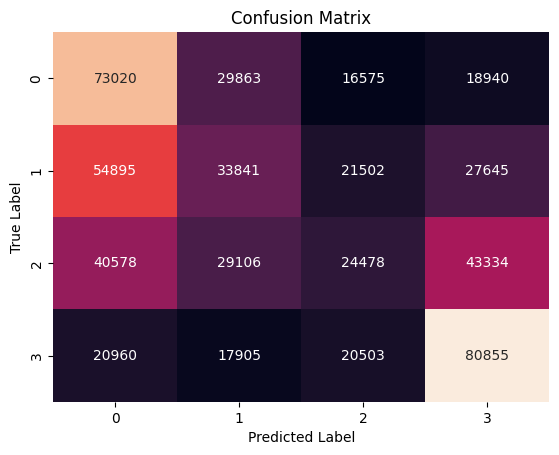

In [ ]:
#inspeccionamos la matriz de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(yts, estimator.predict(Xts))
sns.heatmap(cm,annot=True,cbar=False, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [ ]:
#vamos a escoger el modelo que vamos a usar para realizar las predicciones usando la tecnica de validación
from sklearn.model_selection import cross_validate, ShuffleSplit




In [ ]:
estimator1 = RandomForestClassifier(n_estimators=5,max_depth=12) #elegimos el primer estimador con randomforestclassifier
z1 = cross_validate(estimator1, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.8))

In [ ]:
report_cv_score(z1) #mostramos los puntajes de los datos de entrenamiento y prueba para randomforest classifier

test score   0.373 (±0.0023) with 5 splits
train score  0.462 (±0.0012) with 5 splits


In [ ]:
#usamos el decisiontreeclasiffier como el estimador 2
estimator2 = DecisionTreeClassifier(max_depth=12)
z2= cross_validate(estimator2, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.8))


In [ ]:
report_cv_score(z2) #mostramos los puntajes de los datos de entrenamiento y prueba para decisiontreeclassifier


test score   0.367 (±0.0017) with 5 splits
train score  0.462 (±0.0019) with 5 splits


In [ ]:
#observamos cual de los dos estimadores anteriores es el mejor
if z1["test_score"].mean() > z2["test_score"].mean():
    estimator = z1["estimator"][np.argmax(z1["test_score"])]
    print ("estimator 1 is better")
else:
    estimator = z2["estimator"][np.argmax(z2["test_score"])]
    print ("estimator 2 is better")



estimator 1 is better


In [ ]:
Xtr.values

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#vamos a usar el estimador de randomforest classsifier debido a que fue el que se escogio usando la tecnica de validación cruzada
rf=DecisionTreeClassifier(max_depth=12)
rf.fit(Xtr.values,ytr)

DecisionTreeClassifier(max_depth=12)

In [ ]:
#para gráficar la curva de aprendizaje del modelo, vamos a calcular el promedio y la desviación estándar usando la validación cruzada
train_scores_mean = np.mean(train_scores, axis=1)
train_scores
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

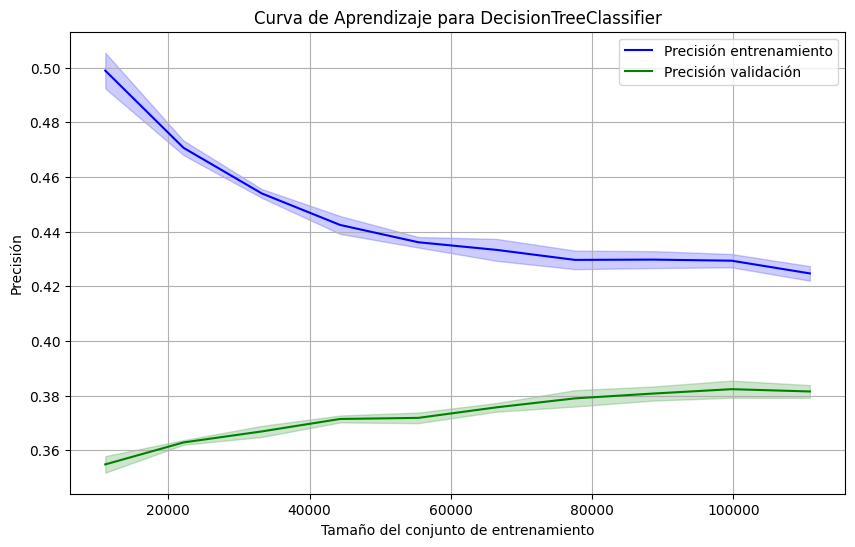

In [ ]:
#graficamos la curva de aprendizaje para mirar si hay un sobreajuste o no esta bien ajustado el modeo
plt.figure(figsize=(10, 6))

#  realizamos la Curva de entrenamiento
plt.plot(train_sizes, train_scores_mean, label="Precisión entrenamiento", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")

# realizamos la Curva de validación
plt.plot(train_sizes, test_scores_mean, label="Precisión validación", color="green")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean+ test_scores_std, alpha=0.2, color="green")
#asignamos las etiquetas y el titulo
plt.title('Curva de Aprendizaje para DecisionTreeClassifier')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')

# Mostramos el gráfico
plt.grid(True)
plt.show()

In [ ]:
#en este caso, se observa que puede existit un sobreajuste, lo cual se podria evitar añadiendo más columnas o reduciendo la complejidad del modelo

In [ ]:
#calculamos el porcentaje de acierto del modelo
print ("train accuracy %.2f"%rf.score(Xtr,ytr))
print ("test accuracy  %.2f"%rf.score(Xts,yts))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


train accuracy 0.42
test accuracy  0.38


In [ ]:
#cargamos los datos de test
zt = pd.read_csv("test.csv")
zt

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [ ]:
#vamos aplicarle un preprocesado a los datos de test para llevarlos a forma numerica, sin embargo en este caso no vamos a eliminar la columna del ID
zt_ids = zt['ID'].values

In [ ]:
zt = zt[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO','PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONPADRE']]
print ("shape of loaded dataframe", zt.shape)
zt.head()

shape of loaded dataframe (296786, 10)


,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_EDUCACIONPADRE
0,Primaria completa,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Si,20183,TRABAJO SOCIAL,BOLIVAR,Técnica o tecnológica completa
1,Técnica o tecnológica completa,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,No,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Secundaria (Bachillerato) completa
2,Secundaria (Bachillerato) completa,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,No,20212,INGENIERIA MECATRONICA,BOGOTÁ,Secundaria (Bachillerato) incompleta
3,Primaria incompleta,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,No,20195,CONTADURIA PUBLICA,SUCRE,Primaria incompleta
4,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,No,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Secundaria (Bachillerato) completa


In [ ]:
#observamos los datos faltantes que hay en cada una de las columnas
zt.isnull().sum()

,0
FAMI_EDUCACIONMADRE,10223
ESTU_VALORMATRICULAUNIVERSIDAD,2723
ESTU_HORASSEMANATRABAJA,13379
FAMI_ESTRATOVIVIENDA,13795
FAMI_TIENEINTERNET,11539
ESTU_PAGOMATRICULAPROPIO,2807
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
FAMI_EDUCACIONPADRE,9993


In [ ]:
#asignamos no info a los datos faltantes de las columna
zt=zt.copy() #creamos una copia de los datos
zt.ESTU_VALORMATRICULAUNIVERSIDAD.values[zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info' #le asignamos no info a los datos faltantes
zt.ESTU_HORASSEMANATRABAJA.values[zt.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
zt.FAMI_EDUCACIONPADRE.values[zt.FAMI_EDUCACIONPADRE.isna()] = 'no info'
zt.FAMI_EDUCACIONMADRE.values[zt.FAMI_EDUCACIONMADRE.isna()] = 'no info'
zt.FAMI_TIENEINTERNET.values[zt.FAMI_TIENEINTERNET.isna()] = 'no info'
zt.ESTU_PAGOMATRICULAPROPIO.values[zt.ESTU_PAGOMATRICULAPROPIO.isna()] = 'no info'

In [ ]:
#le aplicamos un one-hot encoding a la columna Periodo
zt=zt.copy() #creamos una copia de los datos
#Primero se crea un one-hot mapping
x = zt.PERIODO.values
PERIODO_vals = sorted(np.unique(x))
PERIODO_onehot_vals = {val: np.eye(len(PERIODO_vals))[i] for i,val in enumerate(PERIODO_vals)}
PERIODO_onehot_vals

{20183: array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 20184: array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 20194: array([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 20195: array([0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 20196: array([0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 20202: array([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 20203: array([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 20212: array([0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 20213: array([0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
PERIODO_onehot_enc = np.r_[[PERIODO_onehot_vals[i] for i in zt.PERIODO]]
PERIODO_onehot_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
PERIODO_df = pd.DataFrame(PERIODO_onehot_enc, columns=[f"PERIODO__{v}" for v in PERIODO_onehot_vals])
PERIODO_df

,PERIODO__20183,PERIODO__20184,PERIODO__20194,PERIODO__20195,PERIODO__20196,PERIODO__20202,PERIODO__20203,PERIODO__20212,PERIODO__20213
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
296784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna del periodo
zt = pd.concat([zt, PERIODO_df], axis=1).drop('PERIODO', axis=1)
zt.shape

(296786, 18)

In [ ]:
##seguimos con la columna del programa academico
zt.ESTU_PRGM_ACADEMICO.isna()#miramos si hay valores nulos en la columna
zt.ESTU_PRGM_ACADEMICO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PRGM_ACADEMICO,
DERECHO,22984
ADMINISTRACION DE EMPRESAS,22298
CONTADURIA PUBLICA,16861
PSICOLOGIA,13818
INGENIERIA INDUSTRIAL,12516
...,...
DISEÑO Y GESTIÓN DEL PRODUCTO,1
LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN IDIOMAS EXTRANJEROS,1
ADMINISTRACION TECNOLOGICA,1


In [ ]:
#le vamos a aplicar un one-hot encoding a la columna de programa academico
ESTU_PRGM_ACADEMICO_vals=zt.ESTU_PRGM_ACADEMICO.sort_values().unique()
ESTU_PRGM_ACADEMICO_vals
np.eye(len(ESTU_PRGM_ACADEMICO_vals))[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
zt["ingenieria"] = [1 if i == "Ingeniería" else 0 for i in zt.ESTU_PRGM_ACADEMICO]  #agrupamos los programas academicos en areas del conocimiento

zt["licenciatura"] = [1 if i == "Licenciatura" else 0 for i in zt.ESTU_PRGM_ACADEMICO]

zt["educacion_basica"] = [1 if i == "Educación básica" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["educacion_basica"].value_counts()
zt["medicina"] = [1 if i == "Medicina" else 0 for i in zt.ESTU_PRGM_ACADEMICO]

zt["derecho"] = [1 if i == "Derecho" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["derecho"].value_counts()
zt["zootecnia"] = [1 if i == "Zootecnia" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["zootecnia"].value_counts()
zt["administracion"] = [1 if i == "Administración" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["administracion"].value_counts()
zt["arquitectura"] = [1 if i == "Arquitectura" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["arquitectura"].value_counts()
zt["biologia"] = [1 if i == "Biología" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["biologia"].value_counts()
zt["ciencias"] = [1 if i == "Ciencias" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["ciencias"].value_counts()
zt["comunicacion"] = [1 if i == "Comunicación" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["comunicacion"].value_counts()
zt["contabilidad"] = [1 if i == "Contabilidad" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt["contabilidad"].value_counts()
zt['Economia']=[1 if i == "Economía" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Economia'].value_counts()
zt['Enfermeria']=[1 if i == "Enfermería" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Enfermeria'].value_counts()
zt['Estadistica']=[1 if i == "Estadística" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Estadistica'].value_counts()
zt['Fisica']=[1 if i == "Física" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Fisica'].value_counts()
zt['Geologia']=[1 if i == "Geología" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Geologia'].value_counts()
zt['Gestion']=[1 if i == "Gestión" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Gestion'].value_counts()
zt['Historia']=[1 if i == "Historia" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Historia'].value_counts()
zt['Idiomas']=[1 if i == "Idiomas" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['Idiomas'].value_counts()
zt['TRABAJO SOCIAL']=[1 if i == "TRABAJO SOCIAL" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['TRABAJO SOCIAL'].value_counts()
zt['PSICOLOGÍA']=[1 if i == "PSICOLOGÍA" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['PSICOLOGÍA'].value_counts()
zt['QUIMICA']=[1 if i == "Química" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['QUIMICA'].value_counts()
zt['CIENCIA POLITICAS']=[1 if i == "Ciencia Políticas" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['CIENCIA POLITICAS'].value_counts()

zt['MEDICINA VETERINARIA Y ZOOTECNIA']=[1 if i == "Medicina veterinaria y zootecnia" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['MEDICINA VETERINARIA Y ZOOTECNIA'].value_counts()
zt['ENFERMERIA']=[1 if i == "Enfermería" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['ENFERMERIA'].value_counts()
zt['ODONTOLOGÍA']=[1 if i == "Odontología" else 0 for i in zt.ESTU_PRGM_ACADEMICO]
zt['ODONTOLOGÍA'].value_counts()
zt['otras']=1

In [ ]:
#eliminamos la columna del nombre del programa academico
zt= zt.drop('ESTU_PRGM_ACADEMICO', axis=1)
zt.shape

(296786, 45)

In [ ]:
#seguimos con la columna del programa por departamento
zt.ESTU_PRGM_DEPARTAMENTO.isna()#miramos si hay valores nulos en la columna
zt.ESTU_PRGM_DEPARTAMENTO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,120714
ANTIOQUIA,35900
VALLE,19183
ATLANTICO,17696
SANTANDER,12198
NORTE SANTANDER,9606
BOLIVAR,8779
CUNDINAMARCA,6017
BOYACA,6017


In [ ]:
#le vamos aplicar un one-hot encoding a la columna
#vamos a aplicarle un one-hot encoding a la columna de programa por departamento
zt=zt.copy() #creamos una copia de los datos
#le vamos aplicar un one-hot encoding a esta columna

x = zt.ESTU_PRGM_DEPARTAMENTO.values
ESTU_PRGM_DEPARTAMENTO_vals = sorted(np.unique(x))
ESTU_PRGM_DEPARTAMENTO_onehot_vals = {val: np.eye(len(ESTU_PRGM_DEPARTAMENTO_vals))[i] for i,val in enumerate(ESTU_PRGM_DEPARTAMENTO_vals)}
ESTU_PRGM_DEPARTAMENTO_onehot_vals

{'AMAZONAS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ANTIOQUIA': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ARAUCA': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'ATLANTICO': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOGOTÁ': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOLIVAR': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'BOYACA': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
#concatenamos los valores de la columna de programa por departamento
ESTU_PRGM_DEPARTAMENTO_onehot_enc = np.r_[[ESTU_PRGM_DEPARTAMENTO_onehot_vals[i] for i in zt.ESTU_PRGM_DEPARTAMENTO]]
ESTU_PRGM_DEPARTAMENTO_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#mostramos la columna del programa por departamento despues de aplicarle el one-hot encoding
ESTU_PRGM_DEPARTAMENTO_df = pd.DataFrame(ESTU_PRGM_DEPARTAMENTO_onehot_enc, columns=[f"ESTU_PRGM_DEPARTAMENTO__{v}" for v in ESTU_PRGM_DEPARTAMENTO_onehot_vals])
ESTU_PRGM_DEPARTAMENTO_df

,ESTU_PRGM_DEPARTAMENTO__AMAZONAS,ESTU_PRGM_DEPARTAMENTO__ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO__ARAUCA,ESTU_PRGM_DEPARTAMENTO__ATLANTICO,ESTU_PRGM_DEPARTAMENTO__BOGOTÁ,ESTU_PRGM_DEPARTAMENTO__BOLIVAR,ESTU_PRGM_DEPARTAMENTO__BOYACA,ESTU_PRGM_DEPARTAMENTO__CALDAS,ESTU_PRGM_DEPARTAMENTO__CAQUETA,ESTU_PRGM_DEPARTAMENTO__CASANARE,...,ESTU_PRGM_DEPARTAMENTO__NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO__PUTUMAYO,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna del programa por departamento
zt = pd.concat([zt, ESTU_PRGM_DEPARTAMENTO_df], axis=1)
zt.shape

(296786, 76)

In [ ]:
#eliminamos la columna del programa por departamento
zt= zt.drop('ESTU_PRGM_DEPARTAMENTO', axis=1)
zt.shape

(296786, 75)

In [ ]:
#seguimos con la columna del valor de la matricula de la universidad
zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()#miramos si hay valores nulos en la columna
zt.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts() #mostramos los valores de esta columna

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,86923
Entre 2.5 millones y menos de 4 millones,55193
Menos de 500 mil,34589
Entre 500 mil y menos de 1 millón,33564
Entre 4 millones y menos de 5.5 millones,29855
Más de 7 millones,29061
Entre 5.5 millones y menos de 7 millones,16558
No pagó matrícula,8320
no info,2723


In [ ]:
#vamos a convertir los valores de esta columna a forma numerica y reemplazamos los valores de cmap y usamos -1 para los valores de los cuales no se tiene información
zt=zt.copy() #creamos una copia de los datos
cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}
zt.ESTU_VALORMATRICULAUNIVERSIDAD=zt.ESTU_VALORMATRICULAUNIVERSIDAD.map(cmap)
zt.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
1.75,86923
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320
-1.00,2723


In [ ]:
#seguimos con la columna de las horas a la semana que trabaja cada estudiante
zt.ESTU_HORASSEMANATRABAJA.isna()#miramos si hay valores nulos en la columna
zt.ESTU_HORASSEMANATRABAJA.value_counts() #mostramos los valores de esta columna

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,106189
0,50422
Entre 11 y 20 horas,49386
Entre 21 y 30 horas,39931
Menos de 10 horas,37479
no info,13379


In [ ]:
#vamos a reemplazar los datos faltantes por -1
zt.ESTU_HORASSEMANATRABAJA.values[zt.ESTU_HORASSEMANATRABAJA.isna()] = 'no info'
#le vamos aplicar un cmap a la columna
zt=zt.copy() #creamos una copia de los datos
cmap={"Más de 30 horas":3.0,
      "0":0,
      "Entre 11 y 20 horas":4.0,
      "Entre 21 y 30 horas":5.0,
      "Menos de 10 horas":2.0,
      "no info":-1}

zt.ESTU_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in zt.ESTU_HORASSEMANATRABAJA]]
zt.ESTU_HORASSEMANATRABAJA.value_counts()

,count
ESTU_HORASSEMANATRABAJA,
3.0,106189
0.0,50422
4.0,49386
5.0,39931
2.0,37479
-1.0,13379


In [ ]:
#le aplicamos el mismo proceso a la columna de famiestratovivienda
#le asignamos no info a los datos faltantes
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info' #le asignamos no info a los datos faltantes
zt.FAMI_ESTRATOVIVIENDA.value_counts() #mostramos los valores de esta columna
zt=zt.copy() #creamos una copia de los datos
cmap={"Estrato 1":1,
      "Estrato 2":2,
      "Estrato 3":3,
      "Estrato 4":4,
      "Estrato 5":5,
      "Estrato 6":6,
      "Sin Estrato":0,
      "no info":-1}

zt.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]
zt.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,99288
3,90719
1,48092
4,27823
-1,13795
5,10194
6,5451
0,1424


In [ ]:
#continuamos con la columna de fami tiene internet
zt.FAMI_TIENEINTERNET.isna()#miramos si hay valores nulos en la columna
zt.FAMI_TIENEINTERNET.value_counts() #mostramos los valores de esta columna

,count
FAMI_TIENEINTERNET,
Si,254075
No,31172
no info,11539


In [ ]:
#le vamos aplicar un one-hot encoding a esta columna
zt=zt.copy() #creamos una copia de los datos
x = zt.FAMI_TIENEINTERNET.values
FAMI_TIENEINTERNET_vals = sorted(np.unique(x))
FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)}
FAMI_TIENEINTERNET_onehot_vals


{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
#concatenamos la columna de fami tiene internet
FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in zt.FAMI_TIENEINTERNET]]
FAMI_TIENEINTERNET_onehot_enc


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])
FAMI_TIENEINTERNET_df

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
296781,0.0,1.0,0.0
296782,0.0,1.0,0.0
296783,0.0,1.0,0.0
296784,0.0,1.0,0.0


In [ ]:
#concatenamos la columna de fami tiene internet
zt = pd.concat([FAMI_TIENEINTERNET_df, zt], axis=1).drop('FAMI_TIENEINTERNET', axis=1)
zt.shape

(296786, 77)

In [ ]:
#continuamos con la columna de la educación del padre
zt.FAMI_EDUCACIONPADRE.isna()#miramos si hay valores nulos en la columna
zt.FAMI_EDUCACIONPADRE.value_counts() #mostramos los valores de esta columna

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,54838
Primaria incompleta,53432
Educación profesional completa,35412
Secundaria (Bachillerato) incompleta,30641
Técnica o tecnológica completa,27045
Primaria completa,24131
Postgrado,19287
Educación profesional incompleta,11744
no info,9993


In [ ]:
#vamos a unificar los valores de no sabe y no aplica
zt=zt.copy() #creamos una copia de los datos
zt.FAMI_EDUCACIONPADRE= ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt. FAMI_EDUCACIONPADRE.values] #unificamos los valores de no sabe y no aplica

In [ ]:
#convertimos la columna de educacion del padre a una variable continua
cmap={"Secundaria (Bachillerato) completa":4,	"Primaria incompleta":3,"Educación profesional completa":5,	"Secundaria (Bachillerato) incompleta":1,
      "Técnica o tecnológica completa":2,
     "Primaria completa	":6,"Postgrado	":7,"Educación profesional incompleta	":8, "Técnica o tecnológica incompleta":9	,"missing":-1}
zt.FAMI_EDUCACIONPADRE=zt.FAMI_EDUCACIONPADRE.map(cmap)
zt.FAMI_EDUCACIONPADRE.value_counts() #mostramos la columna en forma numerica

,count
FAMI_EDUCACIONPADRE,
4.0,54838
3.0,53432
5.0,35412
1.0,30641
2.0,27045
9.0,9677


In [ ]:
#continuamos con la columna de educación de la madre
#unificamos los valores de no sabe y no aplica
zt= zt.copy()
zt.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.FAMI_EDUCACIONMADRE.values]

In [ ]:
#mostramos los valores de la columna
zt.FAMI_EDUCACIONMADRE.value_counts()

,count
FAMI_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,60649
Primaria incompleta,42149
Técnica o tecnológica completa,38571
Educación profesional completa,36477
Secundaria (Bachillerato) incompleta,34566
Primaria completa,24399
Postgrado,20049
no info,12294
Técnica o tecnológica incompleta,11650


In [ ]:
#le aplicamos un one-hot encoding a esta columna
x = zt.FAMI_EDUCACIONMADRE.values   #primero creamos un one-hot mapping
FAMI_EDUCACIONMADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONMADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONMADRE_vals)}
FAMI_EDUCACIONMADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
FAMI_EDUCACIONMADRE_onehot_enc = np.r_[[FAMI_EDUCACIONMADRE_onehot_vals[i] for i in zt.FAMI_EDUCACIONMADRE]]
FAMI_EDUCACIONMADRE_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
FAMI_EDUCACIONMADRE_df = pd.DataFrame(FAMI_EDUCACIONMADRE_onehot_enc, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in FAMI_EDUCACIONMADRE_onehot_vals])
FAMI_EDUCACIONMADRE_df

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#concatenamos la columna de educacion de la madre
zt = pd.concat([FAMI_EDUCACIONMADRE_df, zt], axis=1).drop('FAMI_EDUCACIONMADRE', axis=1)
zt.shape


(296786, 87)

In [ ]:
#seguimos con la columna de pago de matricula propio
zt.ESTU_PAGOMATRICULAPROPIO.isna()#miramos si hay valores nulos en la columna
zt.ESTU_PAGOMATRICULAPROPIO.value_counts() #mostramos los valores de esta columna

,count
ESTU_PAGOMATRICULAPROPIO,
No,163869
Si,130110
no info,2807


In [ ]:
#le aplicamos un mapeo a esta columna
zt=zt.copy()
cmap = {'Si': 1,
        'No': 0,
        'no info': -1,}
zt.ESTU_PAGOMATRICULAPROPIO = zt.ESTU_PAGOMATRICULAPROPIO.map(cmap)
zt.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
0,163869
1,130110
-1,2807


In [ ]:
zt #mostramos el dataset en forma numerica

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,...,ESTU_PRGM_DEPARTAMENTO__NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO__PUTUMAYO,ESTU_PRGM_DEPARTAMENTO__QUINDIO,ESTU_PRGM_DEPARTAMENTO__RISARALDA,ESTU_PRGM_DEPARTAMENTO__SAN ANDRES,ESTU_PRGM_DEPARTAMENTO__SANTANDER,ESTU_PRGM_DEPARTAMENTO__SUCRE,ESTU_PRGM_DEPARTAMENTO__TOLIMA,ESTU_PRGM_DEPARTAMENTO__VALLE,ESTU_PRGM_DEPARTAMENTO__VAUPES
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_data = zt[sorted(zt.columns)].values #se crea un array
X_test_data.shape

(296786, 87)

In [ ]:
Xtr.values

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
preds_ts=rf.predict(X_test_data) #predecimos los datos de test
preds_ts

array([3, 0, 0, ..., 0, 0, 3])

In [ ]:
#pasamos las predicciones a valores textuales
rmapi = {v:k for k,v in rmap.items()}
text_preds_ts = [rmapi[i] for i in preds_ts]

In [ ]:
# creamos el dataframe

submission = pd.DataFrame([zt_ids, text_preds_ts], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,bajo
2,499179,bajo
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,bajo
296783,239074,bajo
296784,963852,bajo


In [ ]:
#guardamos el dataframe
submission.to_csv('submission.csv', index=False)

In [ ]:
!head submission.csv  #mostramos el ID del estudiante con el respectivo rendimiento global que predijo el modelo y este es el formato en el que se debe enviar la solucion a kaggle

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,bajo
499179,bajo
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,bajo
519909,bajo




> Agregar bloque entrecomillado

